## Course End Project
## Retail Analysis with Walmart Data
#### By: Mike Dorado

### Problem Statement:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

### Tasks
#### Basic Statistics tasks
- Which store has maximum sales
- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
- Which store/s has good quarterly growth rate in Q3’2012
- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
- Provide a monthly and semester view of sales in units and give insights

#### Statistical Model
For Store 1 – Build  prediction models to forecast demand:
  - Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
  - Change dates into days by creating new variable.


***

### Data Preparation and Analysis

#### Import Libraries

In [2]:
### Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

- Load the Walmart_Store_sales.csv to a dataframe
- Validate the dataframe (head) to see the labels and data
- Verfiy the dataframe attributes (info)
  - Range Index count matches Column Non-Null Count (6435 entries)
  - dtypes consist of: 
       - 5x Float64
       - 2x int64
       - 1x object
  - Verify no missing data (isna sum)
  - Verify no duplicate data (duplicated sum)

In [3]:
data=pd.read_csv('Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
data.duplicated().sum()

0

#### Data cleanup and Conversions

- Import datetime library
- Convert dataframe Date format from object to datetime
- Validate dtypes updates:
  - 1x datetime64

In [7]:
### Convert data format to datetime
from datetime import datetime
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [8]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

### Statistics Tasks

#### Which store has maximum sales?

- total sales: Dataframe grouped by Store with the sum of Weekly_Sales (rounded and sorted ascending)
- Verify the top results (head)

##### Store ID # 20 - highest sales

In [9]:
total_sales=data.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending=False)

In [10]:
total_sales.head(2)

Store
20    301397792.0
4     299543953.0
Name: Weekly_Sales, dtype: float64

##### Store ID # 20 - highest sales

In [11]:
pd.DataFrame(total_sales).tail(1)

,Weekly_Sales
Store,
33,37160222.0


##### Store ID # 33 - lowest sales

#### Which store has the maximum standard diviation - i.e., the sales vary a lot. 
#### Also, find out the coefficient of mean to the standard diviation

- standard diviation: Dataframe grouped by Store with the standard diviation function (std) on Weekly_sales (rounded and sorted ascending)
- Verify the top results (head)
- Calculate the coefficient of variation for the top result (Store 14)
  - store14 isolated Weekly sales data
  - Calculate store 14 standard diviation / mean * 100 (rounded 2 decimal)
  
##### Store # 14 has the highest variation in sales
##### Coefficient of variatition for Store 14: 15.71%

In [12]:
data_std=data.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending=0)

In [13]:
pd.DataFrame(data_std).head(1)

,Weekly_Sales
Store,
14,317570.0


##### Store # 14 has the highest variation in sales

In [14]:
store14=data[data.Store==14].Weekly_Sales

In [15]:
coefficient_of_variatition=store14.std()/store14.mean()*100
coefficient_of_variatition.round(2)

15.71

##### Coefficient of variatition for Store 14: 15.71%

#### Which store/s has good quarterly growth rate in Q3'2012

- Quarterly sales data for Q2 and Q3: Dataframe ranges grouped by Store with Weekly_Sales (sum and rounded)
  - Q2 range: 2012-04-01 <-> 2012-06-30
  - Q3 range: 2021-07-01 <-> 2012-09-30
- Dataframe table of Q2 sales | Q3 sales | Difference | Growth Rate (sorted by Growth rate ascending)
  - DIfference: q2_sales - q3_sales
  - Growth Rate: q2_sales - q3_sales / q2_sales * 100
  
##### Top 3 Growth rates - Store7 (13.33%), Store16 (8.49%), Store35 (4.47%)

In [16]:
### Q2 Sales
q2_sales=data[(data['Date']>='2012-04-01')&(data['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum().round()
q3_sales=data[(data['Date']>='2012-07-01')&(data['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum().round()

In [17]:
pd.DataFrame({'Q2_Sales':q2_sales,'Q3_Sales':q3_sales,'Difference':(q3_sales-q2_sales),'Growth_Rate':(q3_sales-q2_sales)/q2_sales*100}).sort_values(by=['Growth_Rate'],ascending=0).head()

,Q2_Sales,Q3_Sales,Difference,Growth_Rate
Store,,,,
7,7290859.0,8262787.0,971928.0,13.330775
16,6564336.0,7121542.0,557206.0,8.488383
35,10838313.0,11322421.0,484108.0,4.466636
26,13155336.0,13675692.0,520356.0,3.955475
39,20214128.0,20715116.0,500988.0,2.478405


#### Sales Impacts - which Holidays which have a higher sales than the mean sales in non-holiday season for all stores togather
#### Holidays: 
##### Super_Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
##### Labour_Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
##### Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
##### Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

- Create lists of Specified holidays
- Convert holiday lists to datetime format
- Calculate the holiday mean sales: Weekly_Sales mean (rounded 2 decimals) for each holiday date range (Dataframe Date.isin(Holiday))
- Calculate the non-holiday mean sales: Weekly_Sales mean (rounded 2 decimals) for data with Holiday flag set as 0
- Dataframe table of Holiday and Non-Holiday mean sales listed

##### Greater then mean non-holiday: Thanksgiving - 1471273.43
##### mean sales: Non-Holiday  1041256.38
##### Lesser then mean non-holiday: Christmas - 960833.11

In [18]:
### Holiday Lists
Super_Bowl=['12-2-2010', '11-2-2011', '10-2-2012', '8-2-2013']
Labour_Day=['10-9-2010', '9-9-2011', '7-9-2012', '6-9-2013']
Thanksgiving=['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas=['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Convert to Datetime
Super_Bowl=pd.to_datetime(Super_Bowl, dayfirst=True)
Labour_Day=pd.to_datetime(Labour_Day, dayfirst=True)
Thanksgiving=pd.to_datetime(Thanksgiving, dayfirst=True)
Christmas=pd.to_datetime(Christmas, dayfirst=True)


Super_Bowl_sales=round(data.loc[data.Date.isin(Super_Bowl)]['Weekly_Sales'].mean(),2)
Labour_Day_sales=round(data.loc[data.Date.isin(Labour_Day)]['Weekly_Sales'].mean(),2)
Thanksgiving_sales=round(data.loc[data.Date.isin(Thanksgiving)]['Weekly_Sales'].mean(),2)
Christmas_sales=round(data.loc[data.Date.isin(Christmas)]['Weekly_Sales'].mean(),2)

In [20]:
Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales


(1079127.99, 1042427.29, 1471273.43, 960833.11)

In [21]:
non_holiday_sales=data[(data['Holiday_Flag']==0)]['Weekly_Sales'].mean().round(2)
non_holiday_sales

1041256.38

In [22]:
final_sales=pd.DataFrame({'Super_Bowl_sales':[Super_Bowl_sales],
                          'Labour_Day_sales':[Labour_Day_sales],
                          'Thanksgiving_sales':[Thanksgiving_sales],
                          'Christmas_sales':[Christmas_sales],
                          'non_holiday_sales':[non_holiday_sales]},index=['mean_sales']).T

final_sales

,mean_sales
Super_Bowl_sales,1079127.99
Labour_Day_sales,1042427.29
Thanksgiving_sales,1471273.43
Christmas_sales,960833.11
non_holiday_sales,1041256.38


##### Thanksgiving sales are the highest as compared to the average non holidays sales put togather

#### Provide a monthly and semester view of sales in units and give insights

- Validate Dataframe columns
- Create Monthly labled data (datetime month)
- Create Yearly labled data (datetime year)
- Create Semester labled data (datetime 1st six months H1, datetime 2nd six months H2)
- Plot Monthly Data (X-axis month, Y-axis Weekly Sales)
  - Mothly Max: December 3818686.45
- Plot Yearly Data (2010, 2011, 2012)
  - Year Max: 20144 (Highest Sum of weekly Sales)
- Plot Semester Data (Mean Weekly sales grouped by Year/Semester)
  - Mean Min and Max: 2011 H1 (Min), 2011 H2 (Max)


In [23]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [24]:
import datetime as dt
import pandas as pd
data['month']=data['Date'].dt.month
data['year']=data['Date'].dt.year
data['semester']=np.where(data['Date'].dt.month.le(6),'H1','H2') #assumes a semester is half a year

In [25]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,semester
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,H1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,H1


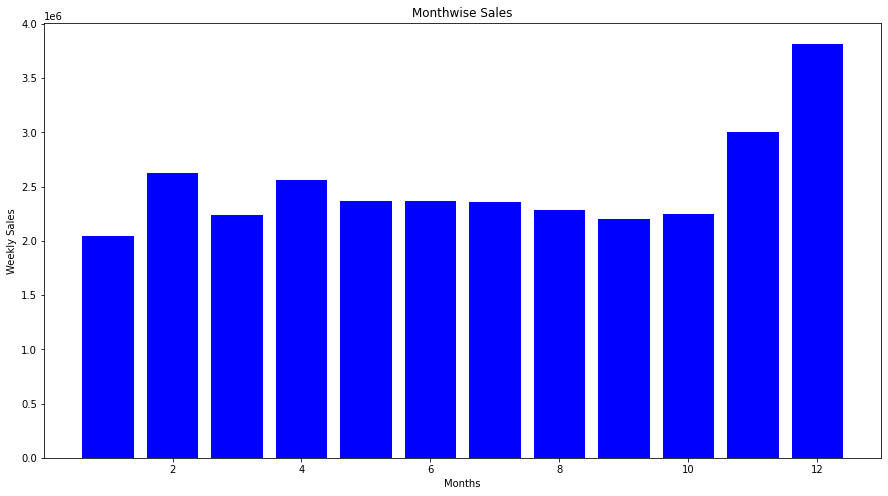

In [26]:
#monthwise sales:
plt.figure(figsize=(15,8))
plt.bar(data['month'],data['Weekly_Sales'],color='blue')
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.title('Monthwise Sales')
plt.show()

In [26]:
data['Weekly_Sales'].max()

3818686.45

In [27]:
data[['Weekly_Sales']].max()

Weekly_Sales    3818686.45
dtype: float64

<Figure size 1080x576 with 0 Axes>

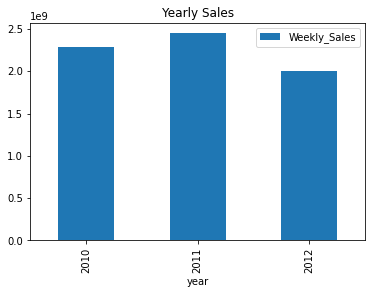

In [28]:
#yearwise sales:
plt.figure(figsize=(15,8))
data.groupby('year')[['Weekly_Sales']].sum().plot(kind='bar',legend=True)
plt.title('Yearly Sales')
plt.show()

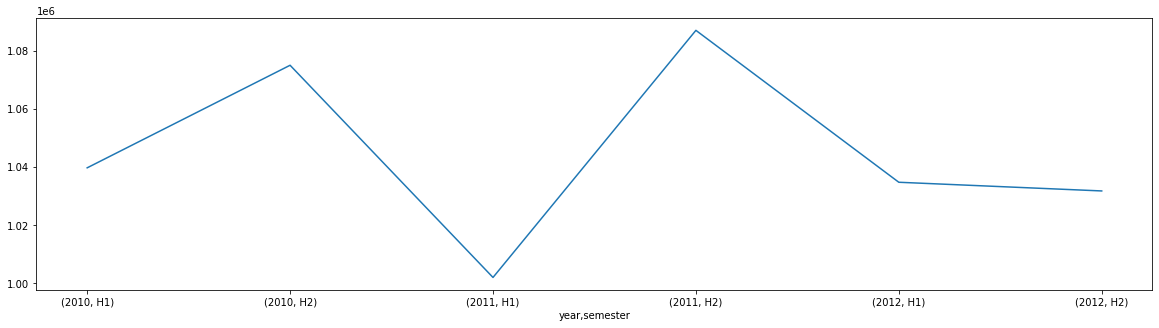

In [29]:
plt.rcParams["figure.figsize"]=(20,5)
data.groupby(['year','semester'])['Weekly_Sales'].mean().plot()
plt.show()

### Statistical Model:

#### Prediction Model to forecast demand

Utilize variables (date, restructured)
Hypothesize if: CPI, Unemployment, and Fuel Price have any impact on Sales.

- Import required Libraries
- Create model using Ordinary Least Square to evaluate the impact on Weekly Sales by the factors (CPI, Unemployment, Fuel Price)

#### Hypothesis Results: The final accuracy of the codel is given by R2 =0.024. 
- The R-squared value of 0.024 indicates that approximately 2.4% of the variance in Weekly_Sales can be explained by the independent variables CPI, Unemployment, and Fuel_Price. 
- This is a low value, suggesting the model is not a good fit for the data and the chosen factors are not strong predictors of weekly sales.
- The p-values for CPI and Unemployment are 0.000, which is < 0.05 
  - This suggests that both CPI and Unemployment have a statistically significant relationship with Weekly_Sales
- The p-value for Fuel_Price is 0.212 (> 0.05), indicating that it does not have a statistically significant impact on Weekly_Sales in this model

In [27]:
import statsmodels.formula.api as sm
model=sm.ols(formula="Weekly_Sales~CPI+Unemployment+Fuel_Price",data=data).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     51.75
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           4.81e-33
Time:                        06:04:33   Log-Likelihood:                -94275.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6431   BIC:                         1.886e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.746e+06   7.96e+04     21.938      0.000    1.59e+06     1.9e+06
CPI          -1696.8760    188.793     -8.988      0.000   -2066.973   -1326.779
Unemployment -4.286e+04   3905.197    -10.975      0.000   -5.05e+04   -3.52e+04
Fuel_Price   -1.927e+04   1.54e+04     -1.248      0.212   -4.95e+04     1.1e+04
==============================================================================
Omnibus:                      370.117   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.792
Skew:                           0.638   Prob(JB):                     1.42e-95
Kurtosis:                       3.051   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Notes:
- Null hypothesis is the initial assumption which we start off with when we are addressing a problem statement
- Null hypothesis WILL ALWYAS INDICATE NO DEPENDANCY/NO RELATIONSHIP
- Alternate hypothesis always negates the Null hypothesis
- WHEN P IS LOW, NULL SHOULD GO.

In [29]:
model1=sm.ols(formula="Weekly_Sales~CPI+Unemployment",data=data).fit()

In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     76.84
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           1.05e-33
Time:                        06:05:23   Log-Likelihood:                -94276.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6432   BIC:                         1.886e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.67e+06   5.12e+04     32.588      0.000    1.57e+06    1.77e+06
CPI          -1652.0937    185.358     -8.913      0.000   -2015.457   -1288.730
Unemployment -4.241e+04   3888.879    -10.906      0.000      -5e+04   -3.48e+04
==============================================================================
Omnibus:                      372.804   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.398
Skew:                           0.640   Prob(JB):                     2.34e-96
Kurtosis:                       3.060   Cond. No.                     1.30e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***

### Summary:

Results from Ordinary Least Square model helped to predict the forecasted demand by testing the relationships of the factors. Considering the size of the data set and the ability of this model may not provide strong evidence for the predictions. Some additional research into other models that better account for seasonality (Holidays) may provide stronger prediction to forecast demand:
- ARIMA (Autoregressive Integrated Moving Average)
- SARIMAX (Seasonal Autoregressive Integrated Moving-Average with eXogenous regressors)
- Exponential Smoothing